# CRTVeto on BNB samples

## Imports

In [52]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Convert ROOT TTrees to Pandas dataframes 

In [53]:
beamON = uproot.open('input/beamON.root')['ubcrt']['_tree']
beamON = pd.DataFrame.from_dict(beamON.arrays(beamON.keys()))
beamON.columns = [x.decode('ascii') for x in beamON.columns]
beamON.head()

,_CRT_hit_PE,_CRT_hit_time,_CRT_hit_x,_CRT_hit_y,_CRT_hit_z,_beam_flash_PE,_beam_flash_time,_dt,_event,_nCRThits_in_event,_nflashes_in_beamgate,_nflashes_in_beamgate_passing_beamspill_and_PE_cuts,_run,_subrun,_within_resolution
0,122.025398,3.922,385.305573,-261.605988,327.806183,142.258143,3.63250,-0.28950,687,112,1,1,15427,13,1
1,122.025398,-1822.698,385.305573,-261.605988,327.806183,-1.000000,-10000.00000,-8177.30200,801,100,0,0,15427,16,0
2,122.025398,-1735.951,385.305573,-261.605988,327.806183,-1.000000,-10000.00000,-8264.04900,830,105,1,0,15427,16,0
3,122.025398,-1786.329,385.305573,-261.605988,327.806183,-1.000000,-10000.00000,-8213.67100,831,88,1,0,15427,16,0
4,122.025398,-8.495,385.305573,-261.605988,327.806183,1152.549978,4.80375,13.29875,832,89,1,1,15427,16,0


In [54]:
beamOFF = uproot.open('input/beamOFF.root')['ubcrt']['_tree']
beamOFF = pd.DataFrame.from_dict(beamOFF.arrays(beamOFF.keys()))
beamOFF.columns = [x.decode('ascii') for x in beamOFF.columns]
beamOFF.head()

,_CRT_hit_PE,_CRT_hit_time,_CRT_hit_x,_CRT_hit_y,_CRT_hit_z,_beam_flash_PE,_beam_flash_time,_dt,_event,_nCRThits_in_event,_nflashes_in_beamgate,_nflashes_in_beamgate_passing_beamspill_and_PE_cuts,_run,_subrun,_within_resolution
0,1.586624e-76,-1791.110,6.983406e-76,9.032548e+271,4.699679e-86,-1.000000,-10000.000000,-8208.890000,651,123,1,0,15427,13,0
1,1.586624e-76,-53.402,6.983406e-76,9.032548e+271,4.699679e-86,167.197446,4.576250,57.978250,664,83,1,1,15427,13,0
2,1.586624e-76,-1891.122,6.983406e-76,9.032548e+271,4.699679e-86,-1.000000,-10000.000000,-8108.878000,684,138,2,0,15427,13,0
3,1.586624e-76,-1908.332,6.983406e-76,9.032548e+271,4.699679e-86,-1.000000,-10000.000000,-8091.668000,828,133,1,0,15427,16,0
4,2.302565e+02,4.465,3.438353e+02,6.582500e+02,1.286594e+02,292.088539,4.414375,-0.050625,845,118,1,1,15427,16,1


## Fraction vetoed by the CRT-Flash matching

In [63]:
# Percentage events with a CRT-Flash match:
print('Vetoed in Beam ON:\t{0:.2f}%.'.format(sum(beamON['_within_resolution'])/len(beamON['_within_resolution'])*100))
print('Vetoed in Beam OFF:\t{0:.2f}%.'.format(sum(beamOFF['_within_resolution'])/len(beamOFF['_within_resolution'])*100))

Vetoed in Beam ON:	36.80%.
Vetoed in Beam OFF:	45.26%.


In [69]:
# Check if all vtoed events did have a valid flash:
beamOFF.query('_within_resolution==1')['_nflashes_in_beamgate_passing_beamspill_and_PE_cuts'].value_counts()
beamON.query('_within_resolution==1')['_nflashes_in_beamgate_passing_beamspill_and_PE_cuts'].value_counts()

1    9482
Name: _nflashes_in_beamgate_passing_beamspill_and_PE_cuts, dtype: int64

In [70]:
# Percentage vetoed that do have a valid flash:
beamOFF_valifflash = beamOFF.query('_nflashes_in_beamgate_passing_beamspill_and_PE_cuts>0')
beamON_valifflash = beamON.query('_nflashes_in_beamgate_passing_beamspill_and_PE_cuts>0')
print('Vetoed in Beam ON:\t{0:.2f}%.'.format(sum(beamON_valifflash['_within_resolution'])/len(beamON_valifflash['_within_resolution'])*100))
print('Vetoed in Beam OFF:\t{0:.2f}%.'.format(sum(beamOFF_valifflash['_within_resolution'])/len(beamOFF_valifflash['_within_resolution'])*100))

Vetoed in Beam ON:	52.79%.
Vetoed in Beam OFF:	66.07%.


## Plots

_CRT_hit_PE  maxdist:  414.2772521972656


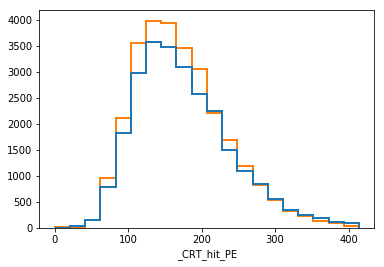

_CRT_hit_time  maxdist:  512.963


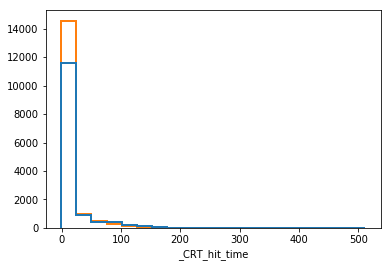

_CRT_hit_x  maxdist:  489.7689208984375


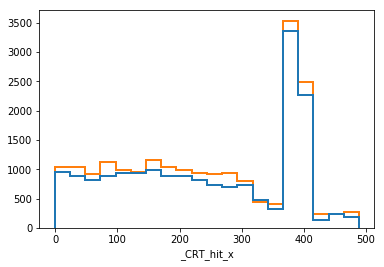

_CRT_hit_y  maxdist:  9.032547990433329e+271


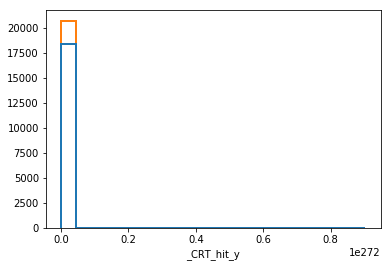

_CRT_hit_z  maxdist:  1180.0205078125


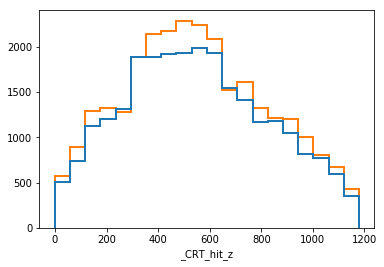

_beam_flash_PE  maxdist:  17580.88134194024


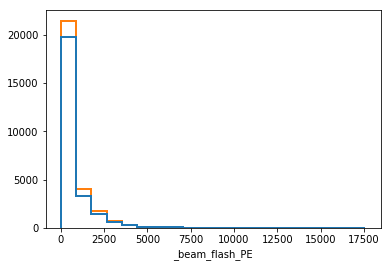

_beam_flash_time  maxdist:  6.24625


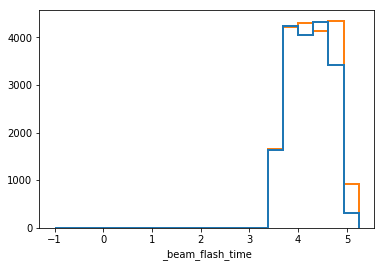

_dt  maxdist:  297.69525


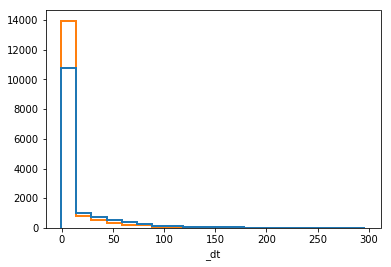

_event  maxdist:  18645


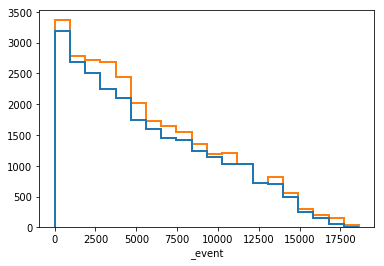

_nCRThits_in_event  maxdist:  387


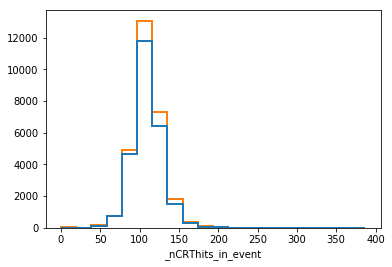

_nflashes_in_beamgate  maxdist:  3


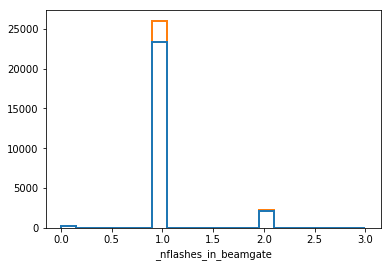

_nflashes_in_beamgate_passing_beamspill_and_PE_cuts  maxdist:  1


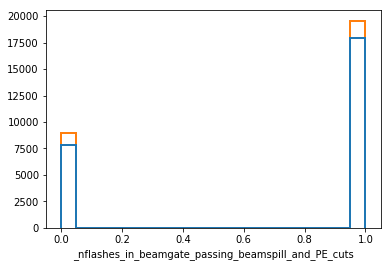

_run  maxdist:  92


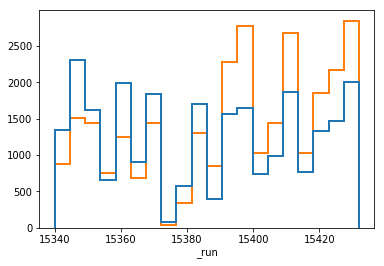

_subrun  maxdist:  372


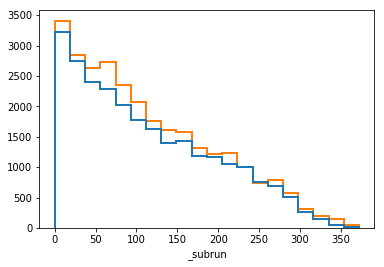

_within_resolution  maxdist:  1


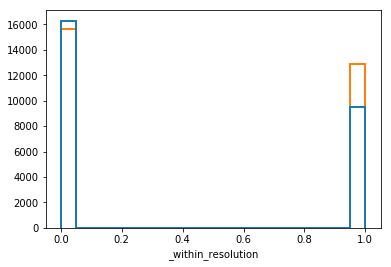

In [57]:
for key in beamOFF.keys():
    x_min = min(beamOFF[key])
    if x_min < -1:
        x_min=-1     # Trick to avoid default large negative values to mess up plots
    x_max = max(beamOFF[key])
    plt.hist([beamON[key] , beamOFF[key]],range=(x_min,x_max),bins=20, histtype='step', lw=2)
    plt.xlabel(key)
    plt.show()